<a href="https://colab.research.google.com/github/Henil21/Ml_collab/blob/main/Neural_network_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow ⛹
**A classification problem involves predicting whether something is one thing or another.**

* Binary classification
* multiclass classification
* multilabel classification

In [116]:
import tensorflow as tf
from sklearn.datasets import make_circles
import numpy as np
# making 1000 example
n_sample=1000
# create circle
x,y =make_circles(n_sample, 
                  noise=0.03,
                  random_state=42)

In [117]:
# lets check lables
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [118]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

**our data is hard to understand lets visualize it.! 👀**

In [119]:
import pandas as pd 
circles=pd.DataFrame({"X0":x[:,0],"x1":x[:,1],"label":y})
circles

,X0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


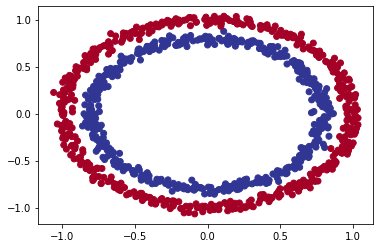

In [120]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

# Input & Output Shape 📄

In [121]:
# checking shape
x.shape , y.shape

((1000, 2), (1000,))

In [122]:
# viewing firste example of features and labels
x[120],y[120]

(array([ 0.18300488, -0.78821267]), 1)

# **Steps in modelling ⚡**
* Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

* In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* creating or importing a model
* compiling the model
* fitting the model
* evaluate the model
* tweak the model 
* evaluate .....

In [123]:
tf.random.set_seed(42)

# creating a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#  compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_1.fit(x,y,epochs=5)


Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


**its only 48% (0.4830) accurate lets evaluate it and improve it ⚙**

##  improving model ⌨
1. Creating a model - here you might want to add more layers, increase the 
number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2. Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).


In [124]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

**To visualize our model's predictions we're going to create a** function `plot_decision_boundary()` which:

* Takes in a trained model, features (X) and labels (y).

* Creates a meshgrid of the different X values.

* Makes predictions across the meshgrid.

* Plots the predictions as well as a line between the different zones (where each unique class falls).

* If this sounds confusing, let's see it in code and then see the output.

🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [125]:
import numpy as np

In [126]:
def plot_decision_boundary(model,x,y):
  """
  plots the decison boundary created by a model predicting on x
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  x_min,x_max  =x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max =x[:,1].min()-0.1,x[:,1].max()+0.1

  # (linspace) return evenly space number between x_min,x_max 
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  x_in=np.c_[xx.ravel(),yy.ravel()]
# making prediction
  y_pred=model.predict(x_in)
  # check for multi class
  if len(y_pred[0])>1:
    print("multiclass")
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("binary")
    y_pred=np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


  # plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  # plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

binary


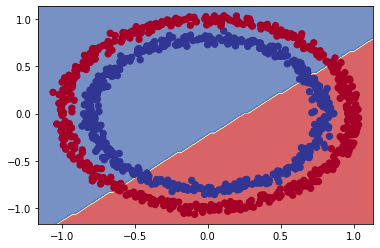

In [127]:
# checking out the prediction
plot_decision_boundary(model_3,x=x,y=y)

In [128]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
#             y_reg_train,
#             epochs=100)

In [129]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100,
            verbose=0)

Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

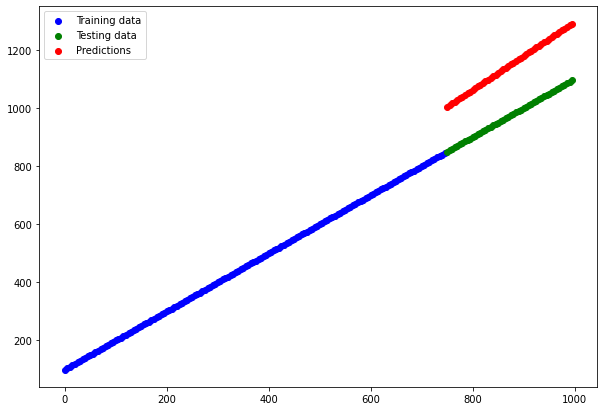

In [130]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# **Missing piece:non-linearity 〰**

In [131]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])
history=model_4.fit(x,y,epochs=100,verbose=0)

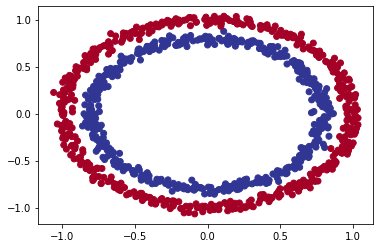

In [132]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

binary


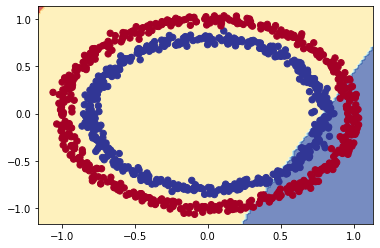

In [133]:
plot_decision_boundary(model_4,x=x,y=y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

In [134]:
tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# model_5.fit(x,y,epochs=100)
history = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/

What we if increased the number of neurons and layers ❓

In [135]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
 tf.keras.layers.Dense(4,activation='relu'),   
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(1)
])
 
model_6.compile(loss=tf.keras.losses.binary_focal_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.fit(x,y,epochs=100,verbose=0)

binary


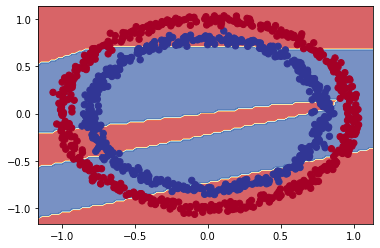

In [136]:
plot_decision_boundary(model_6,x,y)

In [137]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
model_7.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/

binary


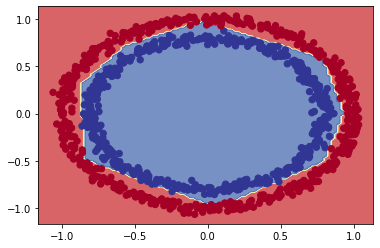

In [138]:
plot_decision_boundary(model_7,x,y)
